In [3]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from factor_analyzer import FactorAnalyzer

import pandas as pd

In [4]:
input_csv = 'dimensioonide_hinnangute_keskmised.csv'
data = pd.read_csv(input_csv)

col_list1 = ['abs_avg1', 'info_avg1', 'aeg_avg1', 'afek_avg1', 'inter_avg1', 'inst_avg1', 'form_avg1', 'keer_avg1', 'subj_avg1', 'spont_avg1', 'imp_avg1', 'arg_avg1']
col_list2 = ['abs_avg2', 'info_avg2', 'aeg_avg2', 'afek_avg2', 'inter_avg2', 'inst_avg2', 'form_avg2', 'keer_avg2', 'subj_avg2', 'spont_avg2', 'imp_avg2', 'arg_avg2']

# mis on vahet nt abs_avg1 ja abs_avg2 vahel?  oli kaks gruppi hindajaid. nt ühelt grupilt tuleb keskmiseks 1.5, teiselt grupilt 
# keskmiseks 1.4, siis keskmine tuleb 1.45.
# kui aga juhtub, et ühelt grupilt saab 1 ja teise grupi hinnangut ei tea üldse (st saab ##), siis DIM_avg1
# korral tehakse (1 + ##)2 = 1
# ja DIM_avg2 korral saab automaatselt -1 (ehk ei tea midagi selle teksti kohta)
# ja kui mõlemad grupid annavad ## ja ##, siis mõlemad saavad keskmiseks ka -1
# valituks osutus: avg1 veerg (sest teeme eelduse, et usaldame hindajate gruppi)

dim_df = pd.DataFrame(data).iloc[:, 1:].astype(float)
dim_ver1 = dim_df[col_list1]
dim_ver1

,abs_avg1,info_avg1,aeg_avg1,afek_avg1,inter_avg1,inst_avg1,form_avg1,keer_avg1,subj_avg1,spont_avg1,imp_avg1,arg_avg1
0,1.450000,1.666667,0.250000,0.800000,0.533333,1.250000,0.4,0.500000,1.300000,0.250,2.000,2.00
1,1.000000,2.000000,0.250000,1.375000,1.000000,1.041667,-1.0,0.600000,2.000000,0.125,0.500,1.00
2,1.500000,-1.000000,-1.000000,2.200000,1.166667,0.750000,0.0,-1.000000,2.333333,0.700,0.670,1.50
3,0.800000,-1.000000,1.000000,1.600000,0.300000,0.300000,0.4,0.000000,2.200000,0.225,1.400,2.00
4,1.250000,1.333333,-1.000000,1.000000,0.200000,0.250000,0.4,0.600000,1.050000,0.500,0.670,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.433333,-1.000000,2.100000,2.200000,1.700000,0.666667,0.2,0.166667,1.400000,-1.000,1.025,0.80
116,0.200000,1.333333,0.733333,1.916667,0.750000,0.000000,0.5,0.200000,2.100000,0.600,1.500,1.80
117,0.000000,2.875000,2.600000,1.083333,0.791667,1.000000,1.0,1.000000,0.250000,0.200,1.250,-1.00
118,0.500000,2.125000,-1.000000,0.200000,0.500000,2.875000,0.2,0.250000,-1.000000,-1.000,1.600,-1.00


In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

"""
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate
at all using the observed correlation matrix against the identity matrix.
If the test found statistically insignificant, you should not employ a factor analysis.

"""

chi_square_value, p_value = calculate_bartlett_sphericity(dim_ver1)
chi_square_value, p_value # p-vä'rtus tuli 1.546077509770011e-69

(508.48797776159284, 1.546077509770011e-69)

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo

"""
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. 
KMO estimates the proportion of variance among all the observed variable. 
Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate.
"""

kmo_all,kmo_model=calculate_kmo(dim_ver1)
kmo_model # tuli 0.79

0.7925066057696006

In [7]:
fa = FactorAnalyzer(rotation=None)
fa.fit(dim_ver1, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev # sain 4 faktorit, mille omaväärtus on üle 1. 

array([4.21612572, 1.80518042, 1.19468539, 1.06602532, 0.80794166,
       0.64700941, 0.58676364, 0.42041283, 0.36353122, 0.33045525,
       0.31902483, 0.2428443 ])

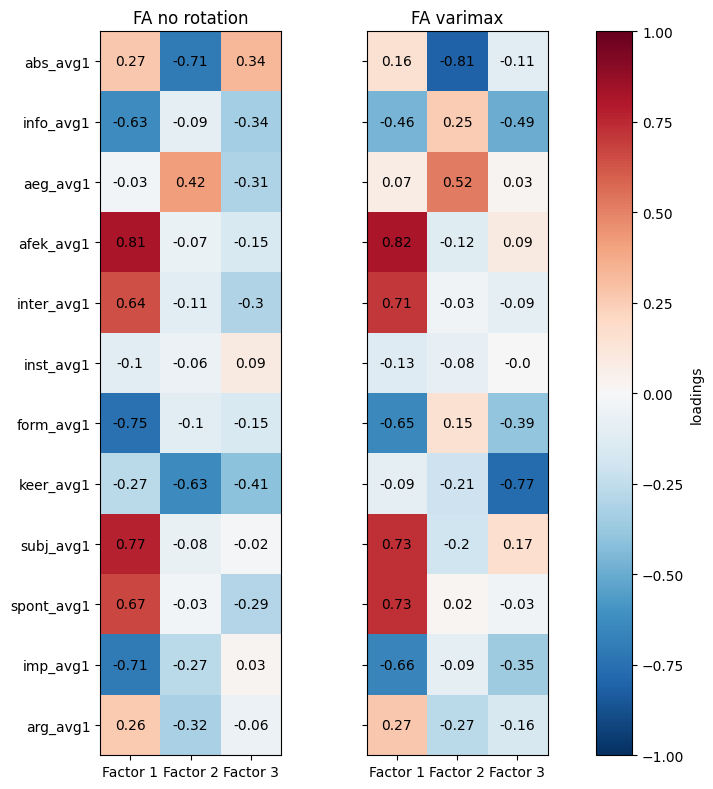

In [8]:
X = StandardScaler().fit_transform(dim_ver1)
factors = 3

fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]  

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the 
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(dim_ver1.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(dim_ver1.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    
# #     factors = 2
#     ax.set_xticks([0, 1])
#     ax.set_xticklabels(["Factor 1", "Factor 2"])
    
    factor = 3
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["Factor 1", "Factor 2", "Factor 3"])
    
#     4 set
#     ax.set_xticks([0, 1, 2, 3])
#     ax.set_xticklabels(["Factor 1", "Factor 2", "Factor 3", "Factor 4"])
    
    
    #  and squeeze the axes tight, to save space
    plt.tight_layout()
    
#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()


'\nA high uniqueness for a variable indicates that the factors do not account well for its variance.\n'

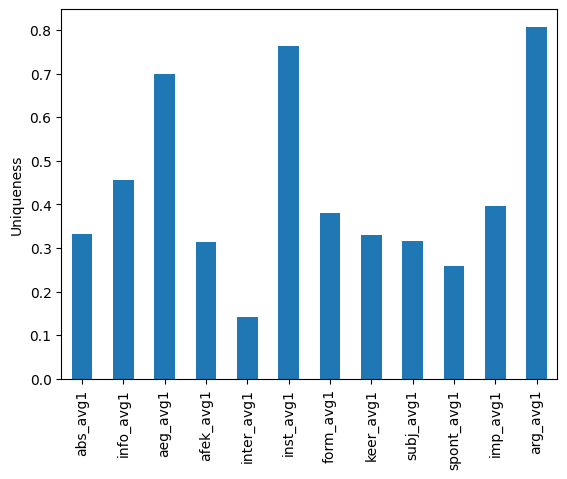

In [25]:
fa = FactorAnalysis(n_components = 5, rotation="varimax")
fa.fit(X)
uniqueness = pd.Series(fa.noise_variance_, index=dim_ver1.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

"""
A high uniqueness for a variable indicates that the factors do not account well for its variance.
"""


'\nAn appropriate factor model results in low values for uniqueness and high values for communality.\nSo if we see bad results for our model, we could try a different number of underlying factors (latent variables).\n'

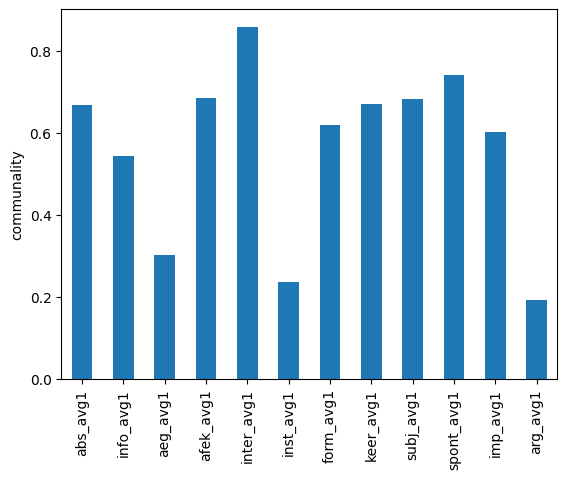

In [26]:
# Communality
communality = pd.Series(np.square(fa.components_.T).sum(axis=1), index=dim_ver1.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

"""
An appropriate factor model results in low values for uniqueness and high values for communality.
So if we see bad results for our model, we could try a different number of underlying factors (latent variables).
"""

In [27]:
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(X))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)

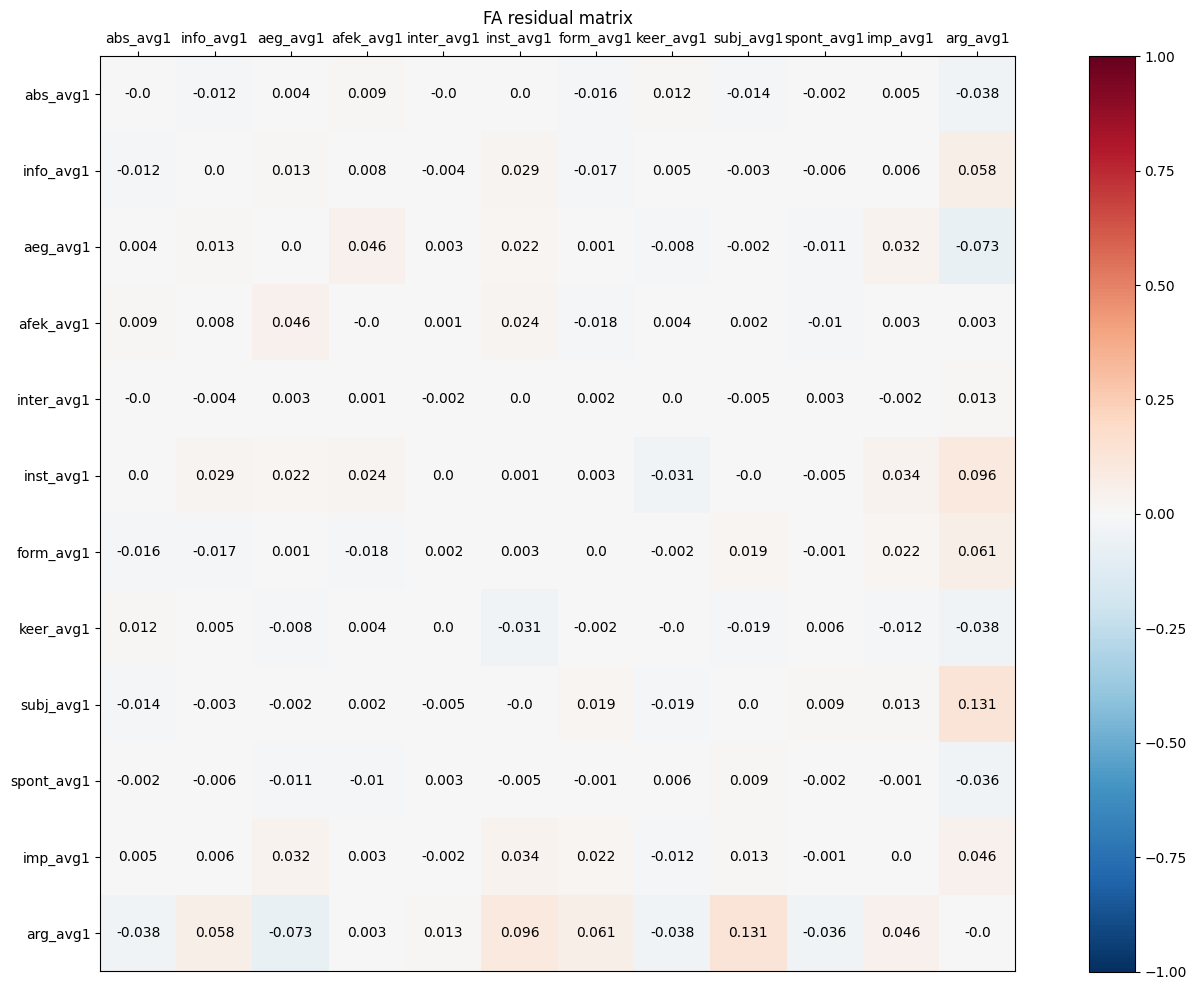

In [40]:

plt.figure(figsize=(15,10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(12))
ax.set_xticklabels(dim_ver1.columns)
ax.set_yticks(range(12))
ax.set_yticklabels(dim_ver1.columns)
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

fig.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()



"Numbers close to 0 indicate that our factor model is a good representation of the underlying system. Now lets plot the results."

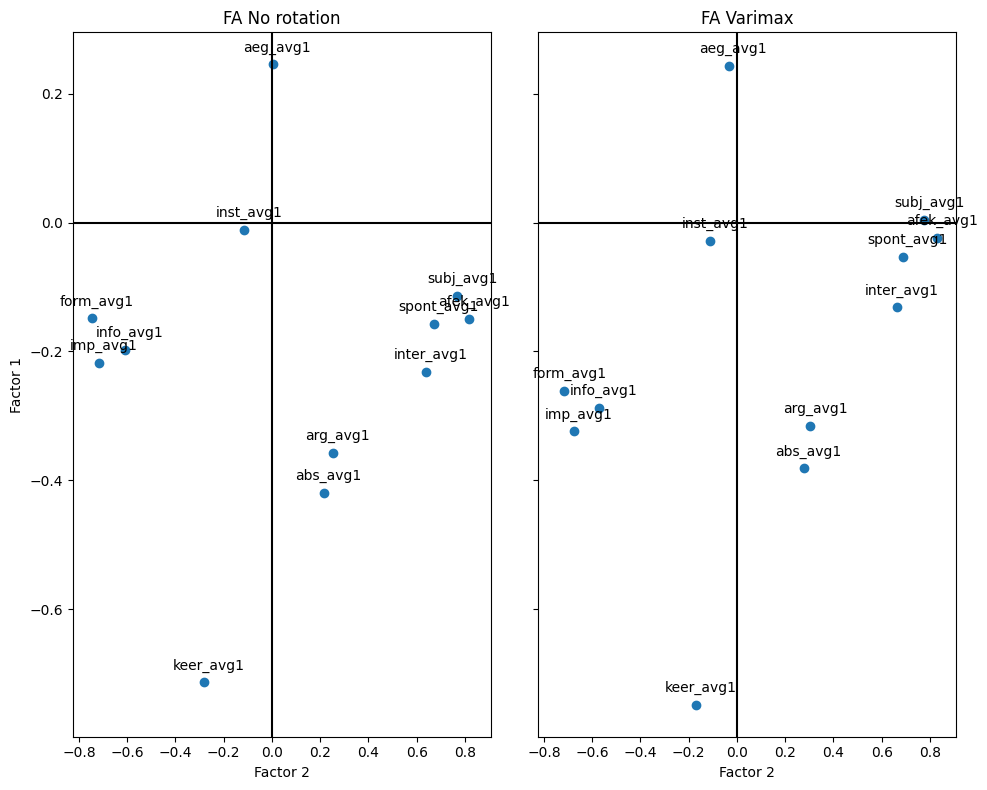

In [11]:
methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
#     ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[0, :], components[1, :], dim_ver1.columns):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()